In [1]:
#Librerías para manejo de datos
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelar
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

#Librería para tendencia al cluster
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#Librerías para visualización de barrios
import geopandas as gp
from seaborn import color_palette
import matplotlib.colors as colors

In [2]:
import matplotlib                                #  ESTO ARREGLA EL ERROR
from matplotlib import rcParams, rcParamsDefault #  findfont: Generic family 'sans-serif' not found because none of the following families were found: 
rcParams.update(rcParamsDefault)                 #  BORRAR UNA VEZ SEGUROS QUE YA NO PASE

In [3]:
df = pd.read_csv('./data/properati_argentina_2021_filtrado.csv')
df_pca = pd.read_csv('./data/properati_argentina_2021_pca.csv')

In [4]:
df_numerico = df.copy()
df_numerico = df.select_dtypes(include=np.number)
df_numerico.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.589974,-58.459133,4,3,171.000000,133.0,210000.0
1,-34.637319,-58.361124,3,2,58.000000,55.0,82900.0
2,-34.628647,-58.361871,4,3,70.000000,70.0,99000.0
3,-34.610027,-58.401934,4,2,135.327513,104.0,146000.0
4,-34.631621,-58.416825,4,2,106.415511,73.0,250000.0


### En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para esta tarea utilizar el algoritmo K-Means

# Ejercicio 2

En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:

● Analizar la tendencia al clustering del dataset.
● Estimar la cantidad apropiada de grupos que se deben formar.
● Evaluar la calidad de los grupos formados realizando un análisis de Silhouette.
● Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
● Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
● Repetir el análisis anterior, utilizando sólo 3 grupos.

Inicialmente se graficará un pairplot para predecir si hay algún par de variables con tendencia al clustering visualmente.

In [5]:
sns.pairplot(df_numerico)

Se observa que algunos candidatos con tendencia al agrupamiento son:

- property_rooms - latitud 

- property_rooms - longitud 

- longitud - latitud 

- property_bedrooms - latitud 

- property_bedrooms - longitud 

- property_price - longitud

- property_price - latitud

- property_rooms - property_price 

- property_bedrooms - property_price 

- property_bedrooms - property_rooms 

## Analizar la tendencia al clustering del dataset.

Para cada par de variables del dataset numérico buscaremos el coeficiente de hopkins para analizar su tendencia al clustering

In [6]:
hopkins(df_numerico, df_numerico.shape[0])

0.00016406561851804914

Se observa que el coeficiente de hopkins tiende a 0, según la documentación de pyclustertend, si el coeficiente resultante tiende a 0, expresa una alta tendencia a la clusterización.

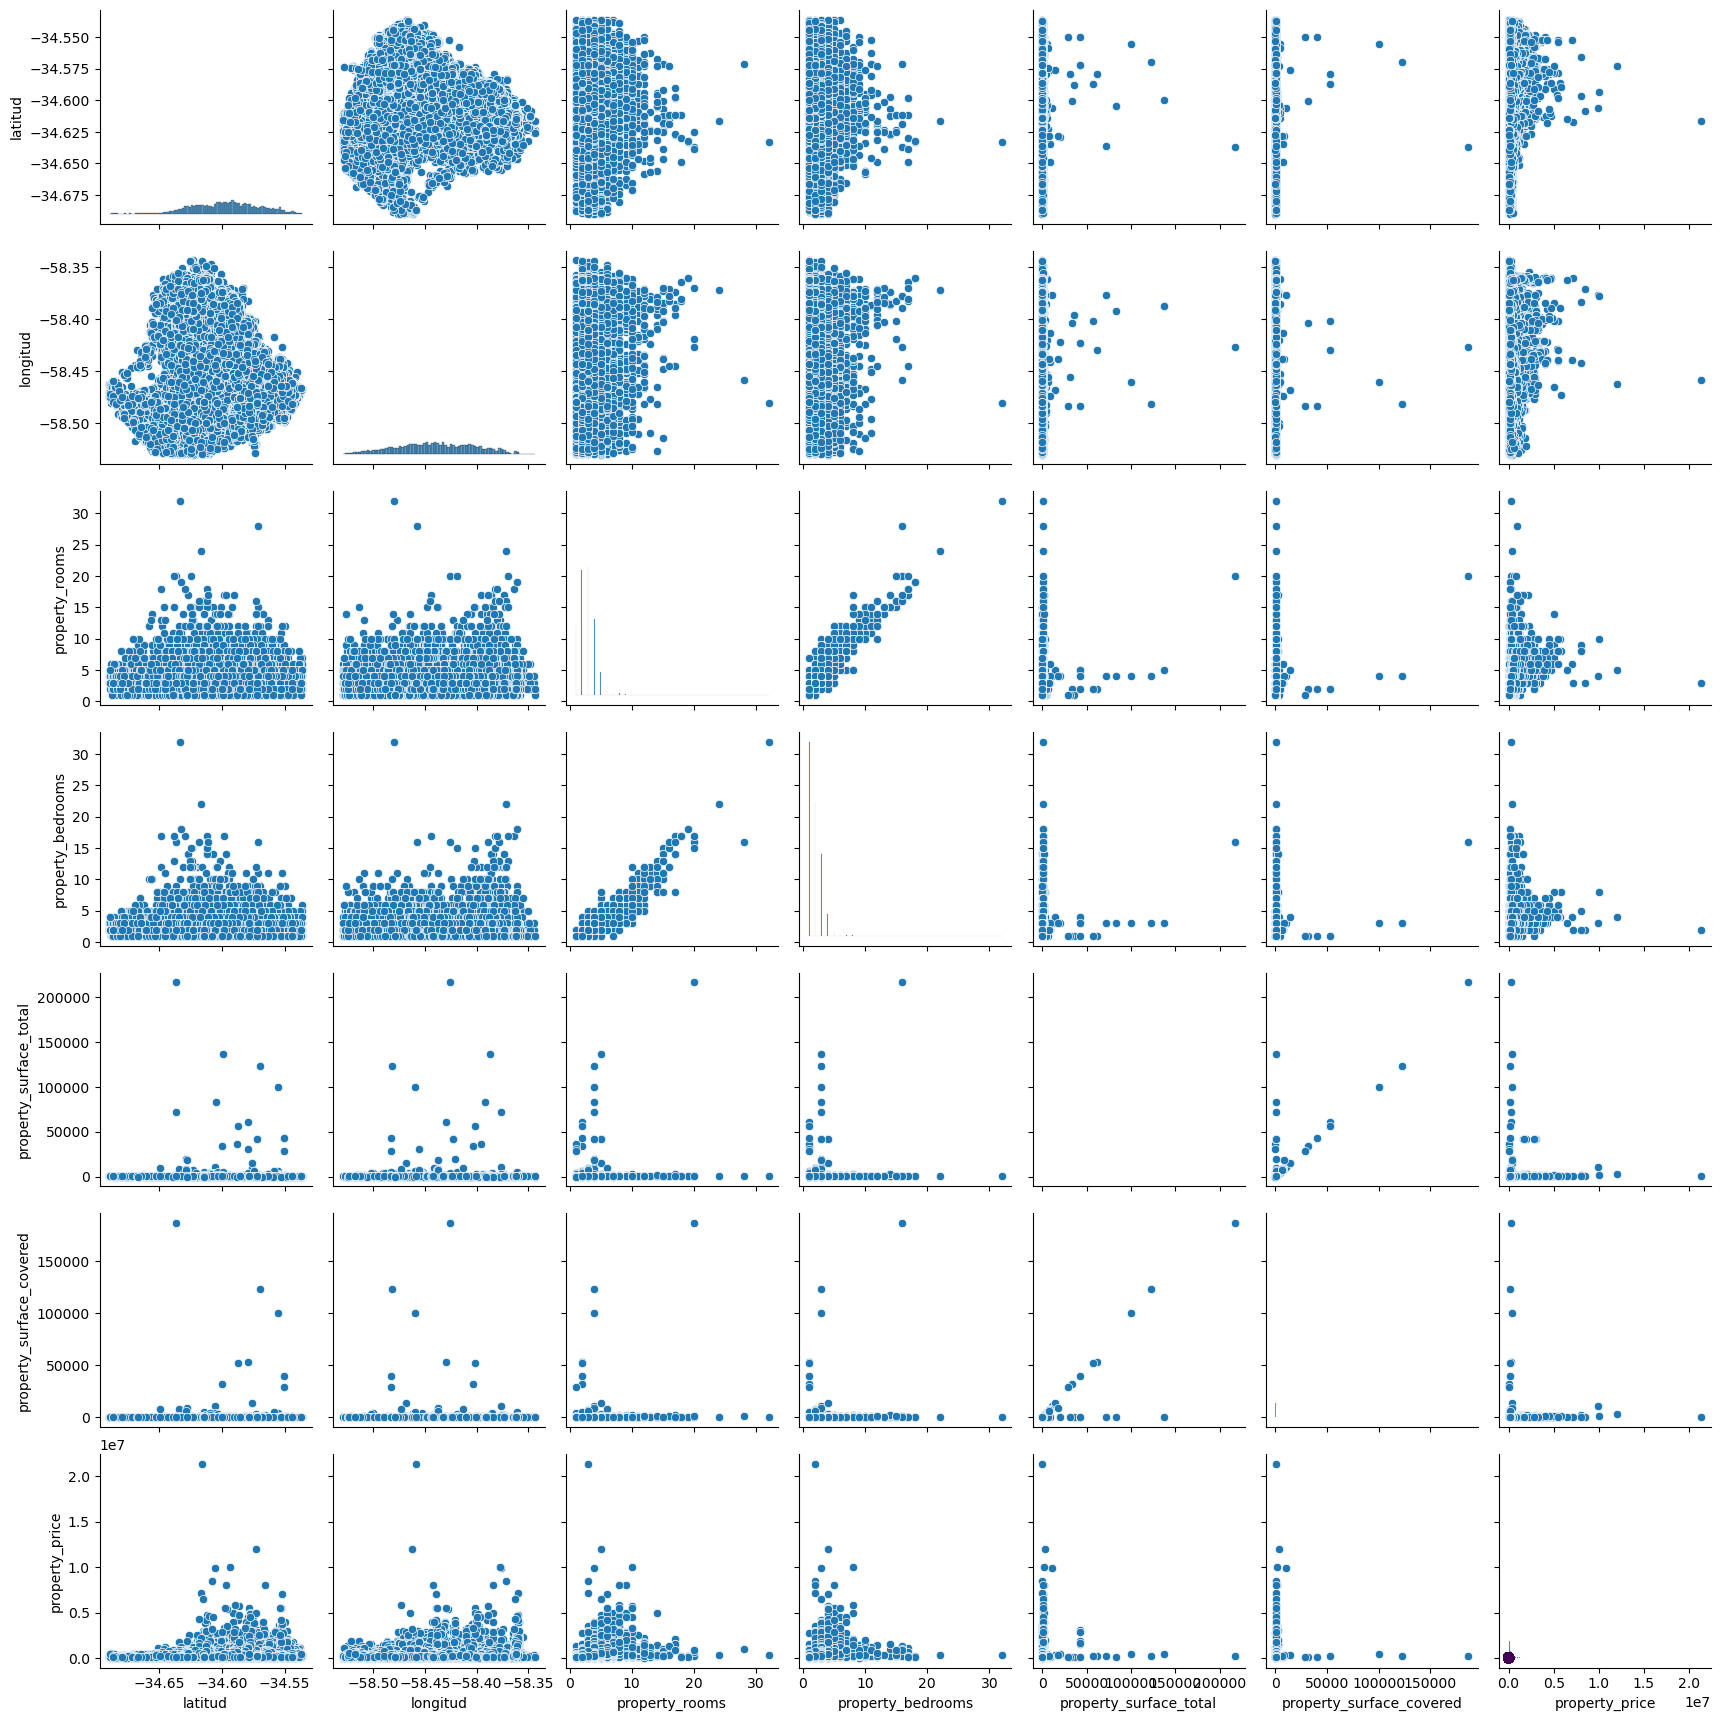

In [7]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.property_rooms, df_numerico.latitud, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

Kmeans tomando una cantidad arbitraria de clusters = 4. Se observa que no hay una tendencia de agrupamiento.

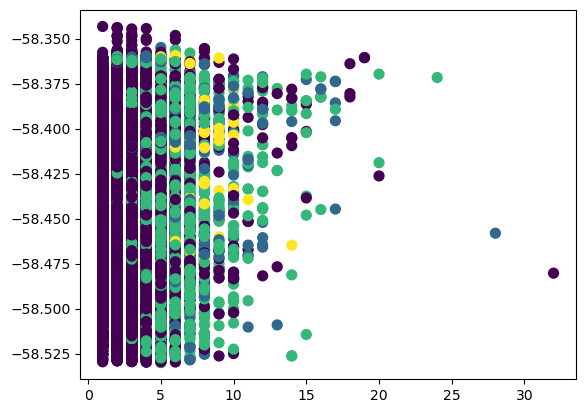

In [8]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.property_rooms, df_numerico.longitud, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

Con el par property_rooms y longitud se observa que tampoco hay tendencia de agrupamiento.

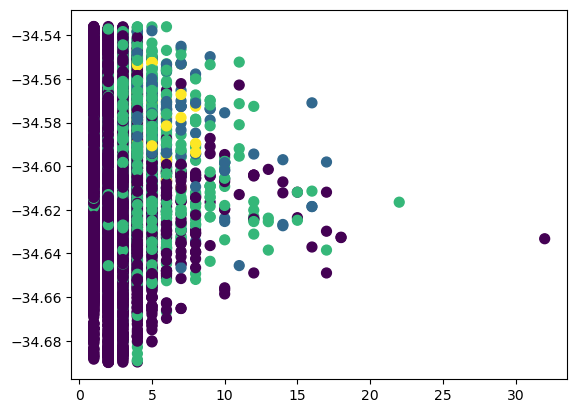

In [9]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.property_bedrooms, df_numerico.latitud, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

Con property_bedrooms y latitud tampoco existe una tendencia de agrupamiento.

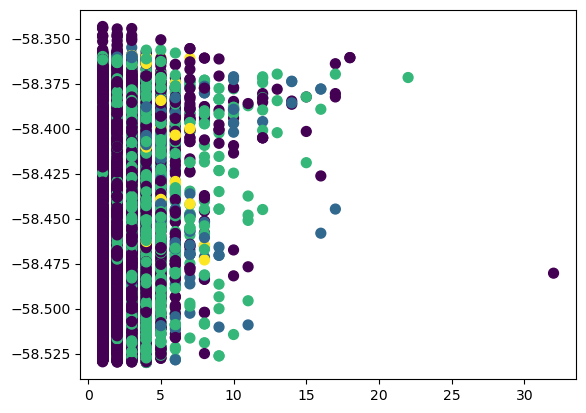

In [10]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.property_bedrooms, df_numerico.longitud, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

Con property_bedrooms y longitud tampoco hay una tendecia de agrupamiento.

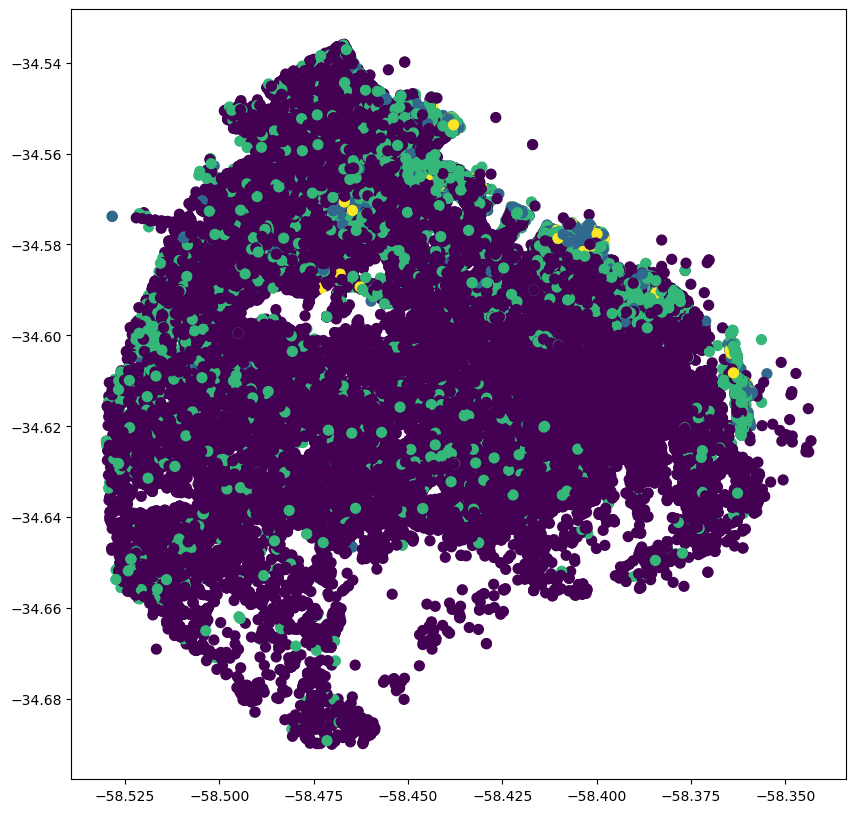

In [11]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(df_numerico.longitud, df_numerico.latitud, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

Nuevamente no hay tendencia de agrupamiento con latitud y longitud

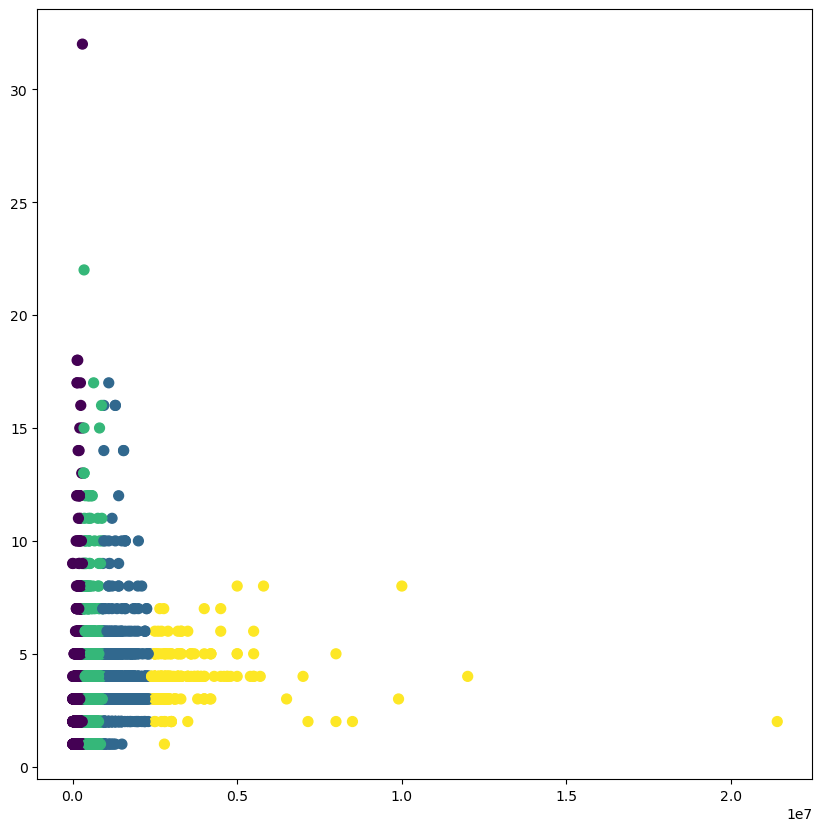

In [12]:
plt.scatter(df_numerico.property_price, df_numerico.property_bedrooms, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

Con el par property_bedrooms y property_price se observa la tendencia al agrupamiento.

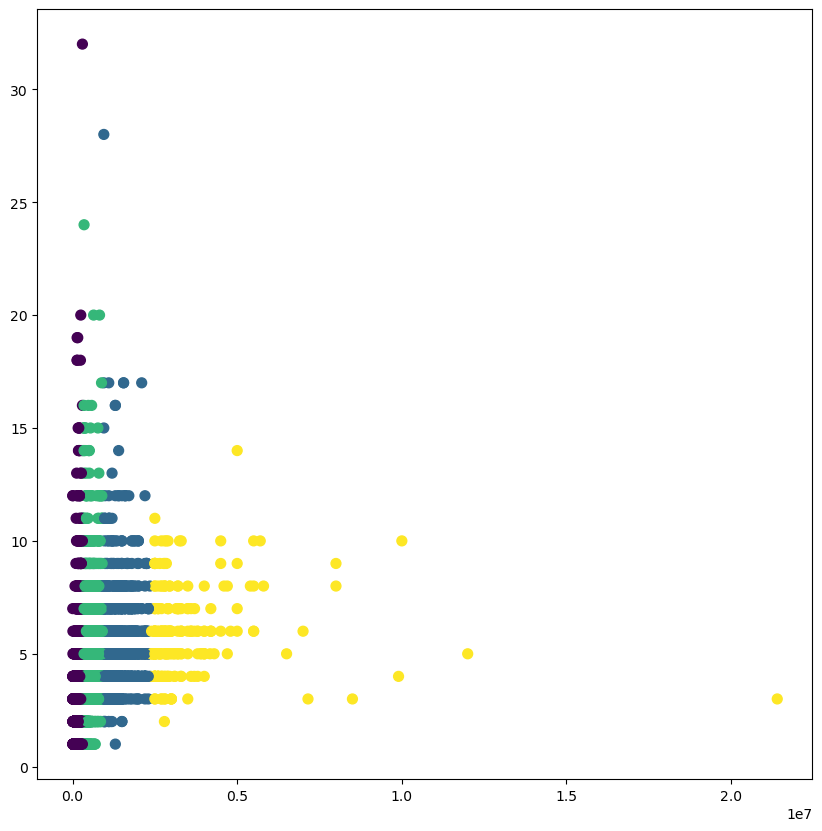

In [13]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.property_price, df_numerico.property_rooms, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

Se puede observar una tendencia de agrupamiento con property_price - property_rooms

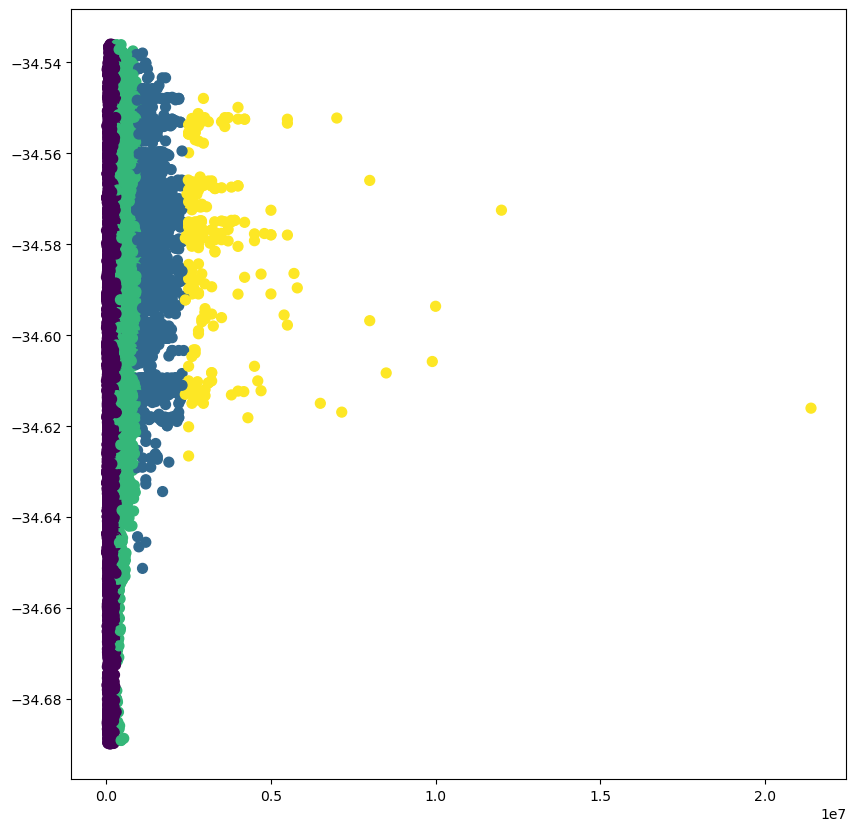

In [14]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.property_price, df_numerico.latitud, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

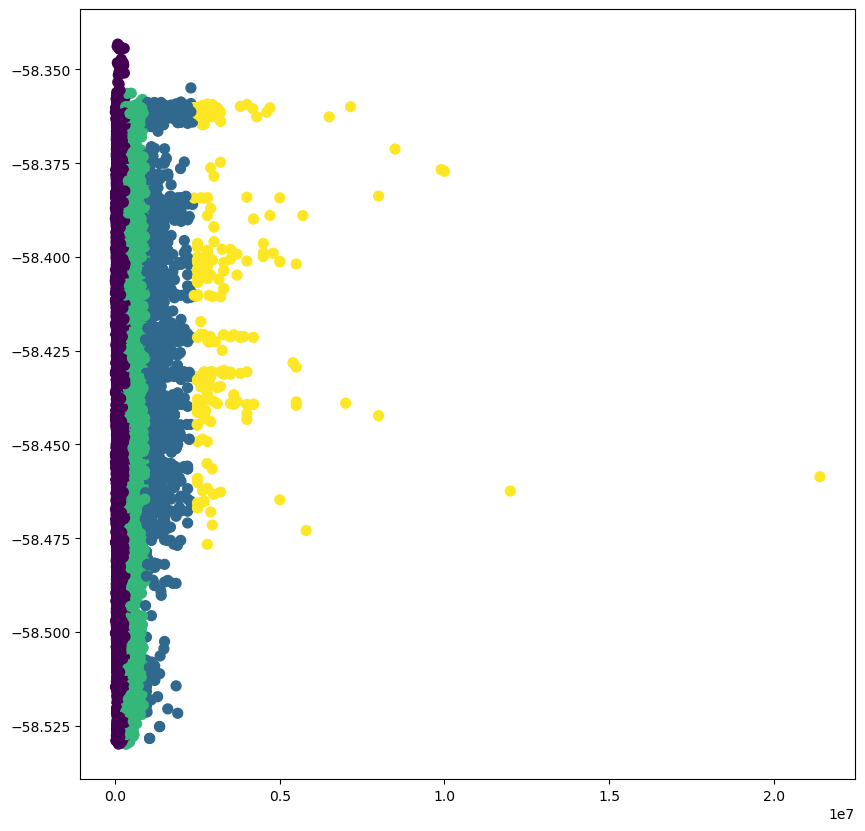

In [15]:
kmeans = KMeans(random_state=2,n_clusters=4)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.property_price, df_numerico.longitud, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

Se puede observar una tendecia de agrupamiento con el property_price tanto con latitud como con longitud

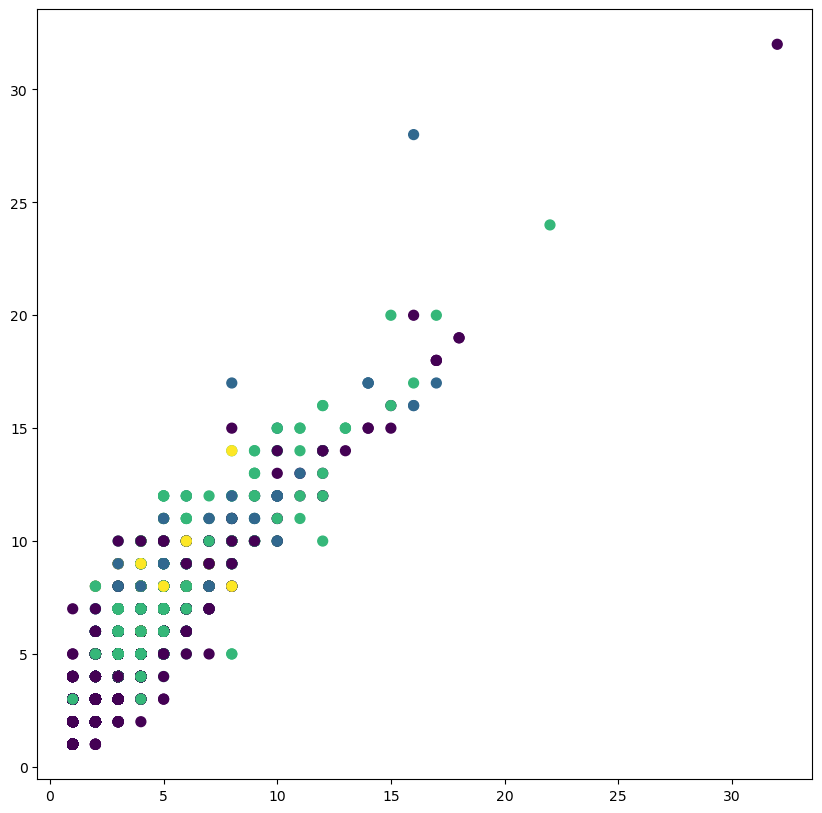

In [16]:
plt.scatter(df_numerico.property_bedrooms, df_numerico.property_rooms, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.show()

Aplicando kmeans con las variables property_rooms y property_bedrooms se observa que no hay tendencia al agrupamiento. No hay un claro agrupamiento como en los gráficos anteriores que se obtuvieron.

## Estimar la cantidad apropiada de grupos que se deben formar.

### Método Elbow

Se aplicará el método Elbow para observar que cantidad de clusters  brinda el mejor agrupamiento

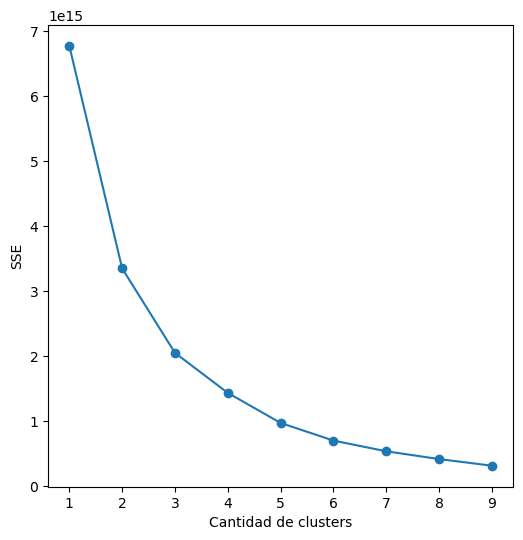

In [17]:

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_numerico)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()


Según el gráfico provisto, la pendiente se terminar de "quebrar" en cantidad = 3, observándose que a partir de 3 hay una tendencia de una pendiente cada vez más suave. Es por esto que n_clusters=3 es un buen candidato para estimar la cantidad apropiada. Aunque también podría tomarse n=2, dado que la pendiente de n=3 es bastante similar a la siguiente.

In [18]:

list_k = list(range(2, 5))

for k in list_k:
    clusterer = KMeans(n_clusters=k)
    preds = clusterer.fit_predict(df_numerico)

    score = silhouette_score (df_numerico, preds)
    print ("Para =" + str(k) + " clusters silhouette score es " + str(score))

Para =2 clusters silhouette score es 0.8781435555978777
Para =3 clusters silhouette score es 0.7777714392126067
Para =4 clusters silhouette score es 0.704851097689483


Con el coeficiente se silhouette, podemos ver que para n=2 se obtiene un excelente valor dado que se aproxima bastante a 1 (mejor valor posible). Mientras que al aumentar los clusters, este valor disminiuye. Reforzando la teoría que n=2 es una buena opción.

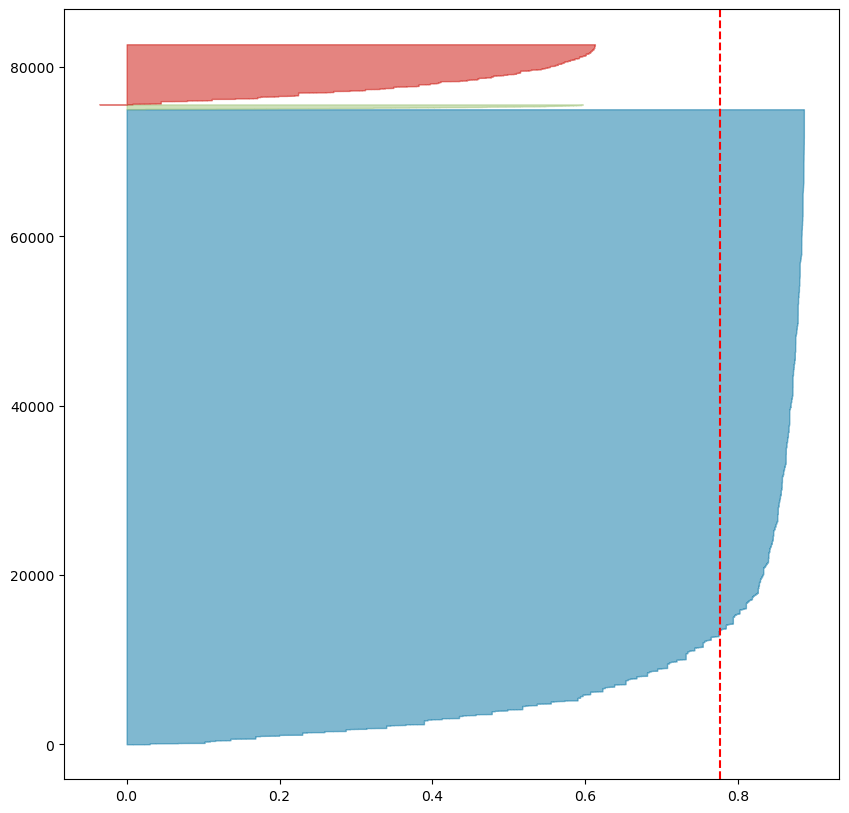

In [19]:
model = KMeans(3, random_state=2)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(df_numerico)
plt.show()

En el gráfico de silhouette, se puede observar que con 3 clusters, no hay valores negativos, pero hay mucha densidad de valores en el primer cluster, siendo el último con muy pocas observaciones.

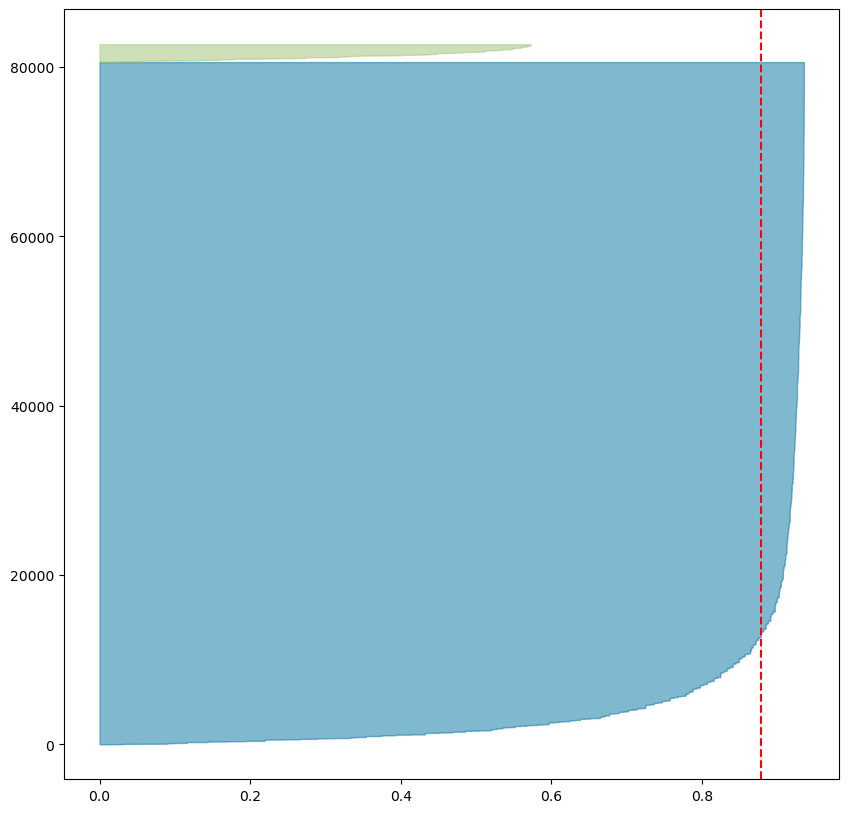

In [20]:
model = KMeans(2, random_state=2)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(df_numerico)
plt.show()

En el gráfico de silhouette, se puede observar que con 2 clusters, no hay valores negativos, pero hay mucha densidad de valores en el segundo cluster, nuevamente no hay una cantidad homogénea de observaciones entre clusters, pero ahora sacando el  grupo más denso, hay mayor participación del restante.

En base al análisis de la tendencia al agrupamiento del dataset, se observa que tomando dos clusters se pueden obtener mejores resultados, y es por ello que se entrenará el modelo para este valor.

## Realizar un análisis de cada grupo intentando entender en función de qué características fueron formados

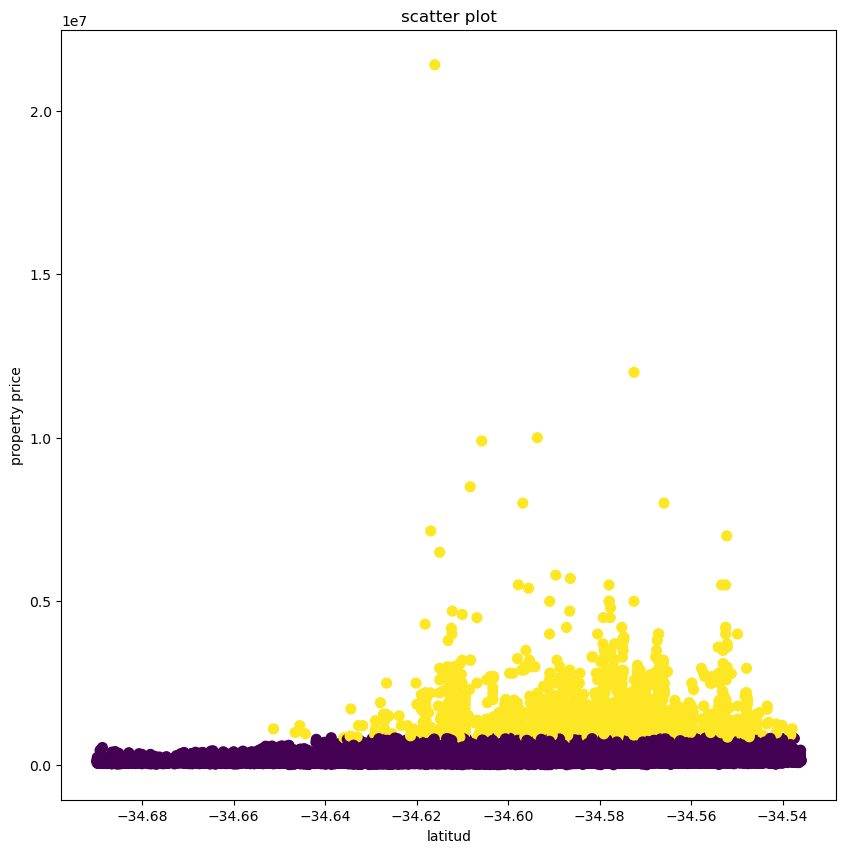

In [21]:
kmeans = KMeans(random_state=2,n_clusters=2)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.latitud, df_numerico.property_price, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('latitud')
plt.ylabel('property price')
plt.title('scatter plot')
plt.show()

En este caso, al hacer un gráfico de dispersión y marcar los grupos predichos, se observan dos grupos como se esperaba. Se puede visualizar que a medida que la latitud crece, el precio también lo hace. Esto puede entenderse si se tiene en cuenta el mapa de CABA los barrios que están con la latitud más alta son Palermo, Recoleta, Villa Urquiza, Belgrano, Nuñez; los cuáles son barrios bastantes caros. Por lo que se podrían agrupar desde la mitad de CABA para abajo como barrios no tan costos y para arriba como los más costoso, según la latitud.

In [22]:
kmeans = KMeans(random_state=2,n_clusters=2)

df_prueba = df_numerico
y_kmeans = kmeans.fit_predict(df_prueba)
plt.scatter(df_prueba.longitud, df_prueba.property_price, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('longitud')
plt.ylabel('property price')
plt.title('scatter plot')

Text(0.5, 1.0, 'scatter plot')

Si se analiza por longitud y precio de la propiedad, se observan dos grupos. Tomando nuevamente que ambos grupos representan dos tipos de precios (normal y alto por ejemplo), el gráfico de agrupamiento es más homogéneo hacia la izquierda y por el contrario, los precios más altos se encuentran hacía la derecha. Esto sumado a que los barrios como Palermo, Recoleta y Puerto Madero se encuentran hacía la "derecha", cuyos precios de propiedad son muy elevados coincide con la visualización obtenida.

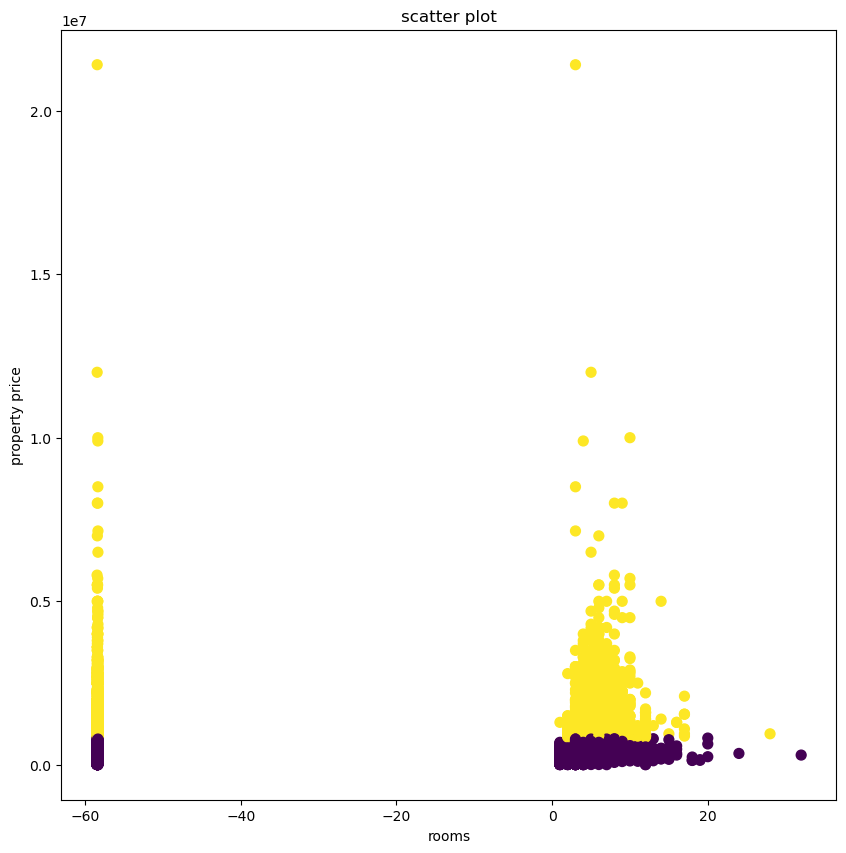

In [23]:
kmeans = KMeans(random_state=2,n_clusters=2)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.property_rooms, df_numerico.property_price, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('rooms')
plt.ylabel('property price')
plt.title('scatter plot')
plt.show()

Se puede observar que el gráfico es más homogéneo del lado izquierdo, por lo que se puede ver que mientras mayor sea el precio, no necesariamente tendrá mayor cantidad de habitaciones.

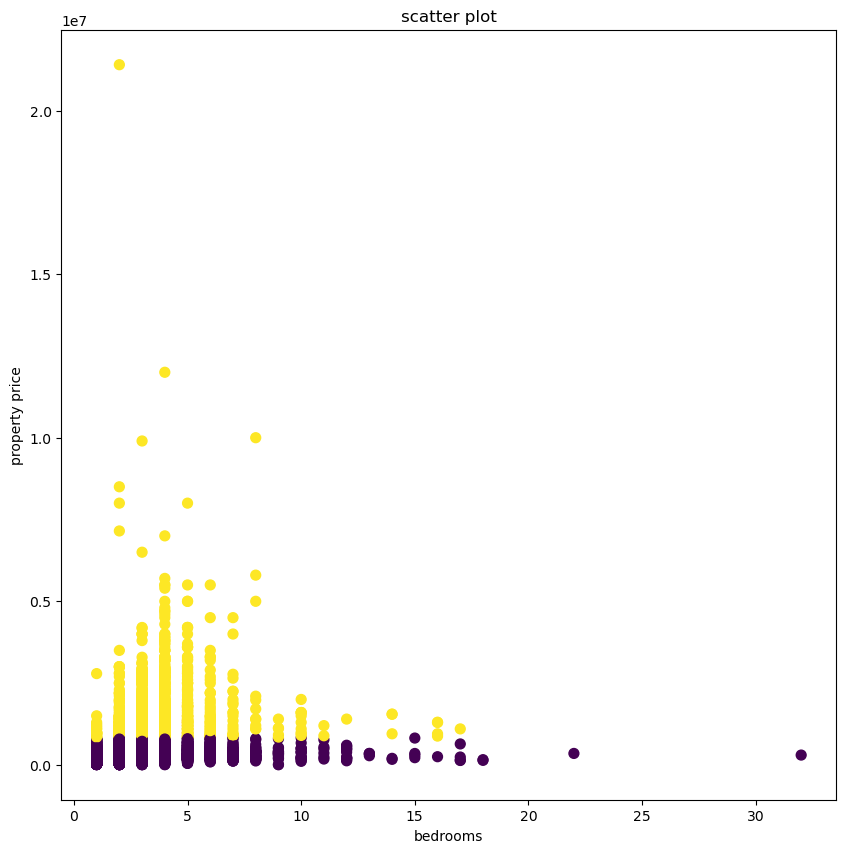

In [24]:
kmeans = KMeans(random_state=2,n_clusters=2)
y_kmeans = kmeans.fit_predict(df_numerico)

plt.scatter(df_numerico.property_bedrooms, df_numerico.property_price, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('bedrooms')
plt.ylabel('property price')
plt.title('scatter plot')
plt.show()

De la misma forma se puede observar el gráfico de property_price y property_bedrooms, es más homogéneo del lado izquierdo, por lo que mientras mayor sea el precio, suelen tener menos habitaciones. Estos casos pueden darse debido a la ubicación del departamento.

## Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que pertenecen

### Visualización en mapa

In [25]:
df_testeo = df_numerico.copy()
df_testeo

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.589974,-58.459133,4,3,171.000000,133.0,210000.0
1,-34.637319,-58.361124,3,2,58.000000,55.0,82900.0
2,-34.628647,-58.361871,4,3,70.000000,70.0,99000.0
3,-34.610027,-58.401934,4,2,135.327513,104.0,146000.0
4,-34.631621,-58.416825,4,2,106.415511,73.0,250000.0
...,...,...,...,...,...,...,...
82658,-34.603245,-58.489810,4,3,130.000000,100.0,220000.0
82659,-34.614063,-58.482814,3,2,68.000000,60.0,161000.0
82660,-34.614175,-58.479062,1,1,51.000000,30.0,75500.0
82661,-34.614175,-58.479062,1,1,37.000000,31.0,74500.0


Análisis de mapa de 2 grupos

In [26]:
kmeans = KMeans(2,random_state=2)
y_kmeans = kmeans.fit_predict(df_testeo[['property_price', 'longitud']])
nueva_colum = pd.DataFrame(y_kmeans, columns=['colores_lon'])
df_testeo = df_testeo.join(nueva_colum)
df_testeo

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,colores_lon
0,-34.589974,-58.459133,4,3,171.000000,133.0,210000.0,0
1,-34.637319,-58.361124,3,2,58.000000,55.0,82900.0,0
2,-34.628647,-58.361871,4,3,70.000000,70.0,99000.0,0
3,-34.610027,-58.401934,4,2,135.327513,104.0,146000.0,0
4,-34.631621,-58.416825,4,2,106.415511,73.0,250000.0,0
...,...,...,...,...,...,...,...,...
82658,-34.603245,-58.489810,4,3,130.000000,100.0,220000.0,0
82659,-34.614063,-58.482814,3,2,68.000000,60.0,161000.0,0
82660,-34.614175,-58.479062,1,1,51.000000,30.0,75500.0,0
82661,-34.614175,-58.479062,1,1,37.000000,31.0,74500.0,0


/home/juan518/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


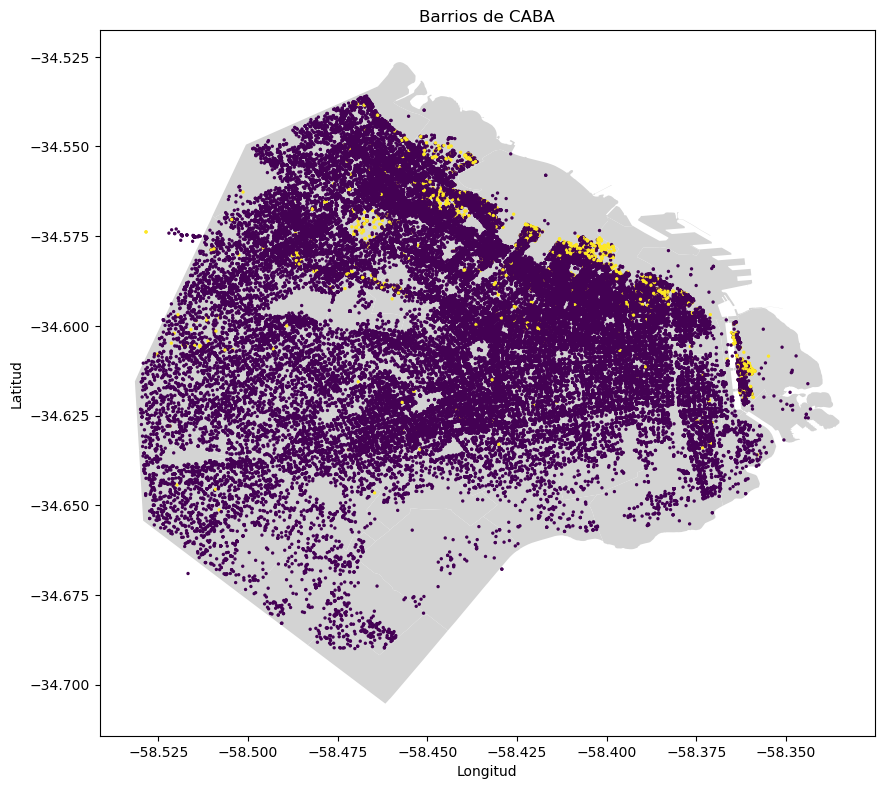

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
barrios = gp.read_file("barrios.geojson")
ax.set_title('Barrios de CABA')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
barrios.plot(ax=ax,column='BARRIO', color='lightgrey');

puntos = gp.GeoDataFrame(df_testeo.colores_lon, geometry=gp.points_from_xy(df_testeo.longitud, df_testeo.latitud))    
puntos.plot(ax = ax, column='colores_lon',cmap = 'viridis',markersize=2)
plt.show();


Se puede ver que hay mayor cantidad de inmobiliarios de precio "normal" que precios "altos"

## Repetir el análisis anterior, utilizando sólo 3 grupos

Hago el grafico de silueta para n=3

In [28]:
kmeans = KMeans(3,random_state=2)
y_kmeans = kmeans.fit_predict(df_testeo[['property_price', 'longitud']])
nueva_colum = pd.DataFrame(y_kmeans, columns=['colores2'])
df_testeo = df_testeo.join(nueva_colum)
df_testeo

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,colores_lon,colores2
0,-34.589974,-58.459133,4,3,171.000000,133.0,210000.0,0,0
1,-34.637319,-58.361124,3,2,58.000000,55.0,82900.0,0,0
2,-34.628647,-58.361871,4,3,70.000000,70.0,99000.0,0,0
3,-34.610027,-58.401934,4,2,135.327513,104.0,146000.0,0,0
4,-34.631621,-58.416825,4,2,106.415511,73.0,250000.0,0,0
...,...,...,...,...,...,...,...,...,...
82658,-34.603245,-58.489810,4,3,130.000000,100.0,220000.0,0,0
82659,-34.614063,-58.482814,3,2,68.000000,60.0,161000.0,0,0
82660,-34.614175,-58.479062,1,1,51.000000,30.0,75500.0,0,0
82661,-34.614175,-58.479062,1,1,37.000000,31.0,74500.0,0,0


In [29]:
#fig=plt.figure()
df_prueba = df_numerico
y_kmeans = kmeans.fit_predict(df_prueba)
plt.scatter(df_prueba.longitud, df_prueba.property_price, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('longitud')
plt.ylabel('property price')
plt.title('scatter plot')

Text(0.5, 1.0, 'scatter plot')

Se pueden ver 3 grupos distintos según el tipo de precio (por ejemplo, podrían representar precios bajos, normales y altos). Se puede observar que mientras más a la derecha vamos más precios altos hay, de la misma manera si vamos hacia la izquierda mayor cantidad de precios normales y bajos existen, todo esto debido a la posición que se encuentran geográficamente.  

/home/juan518/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


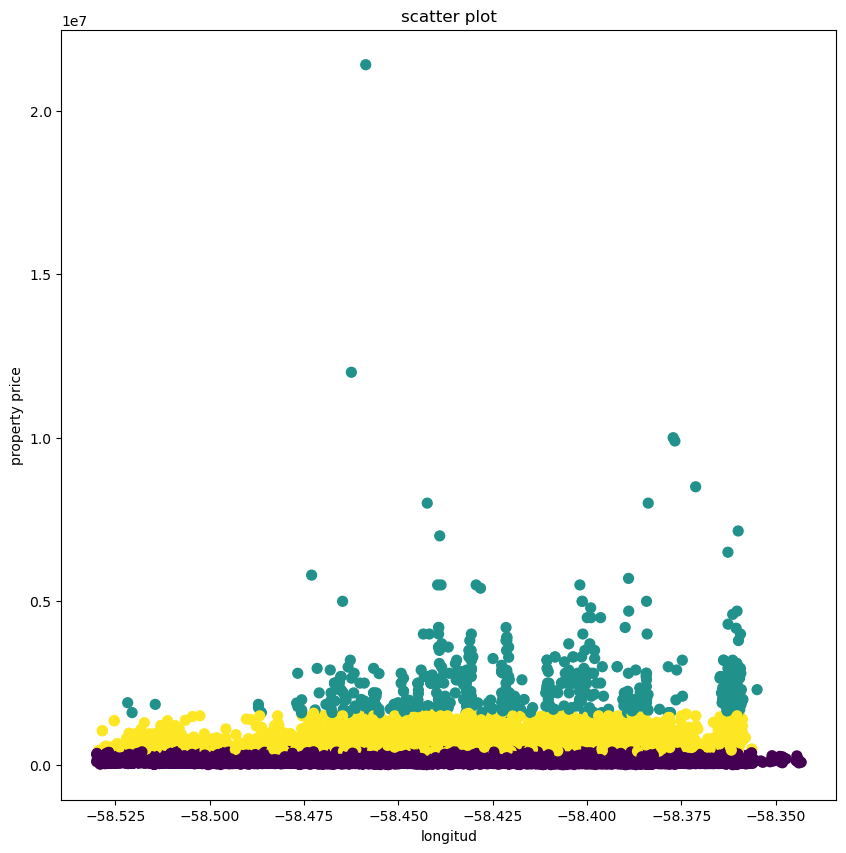

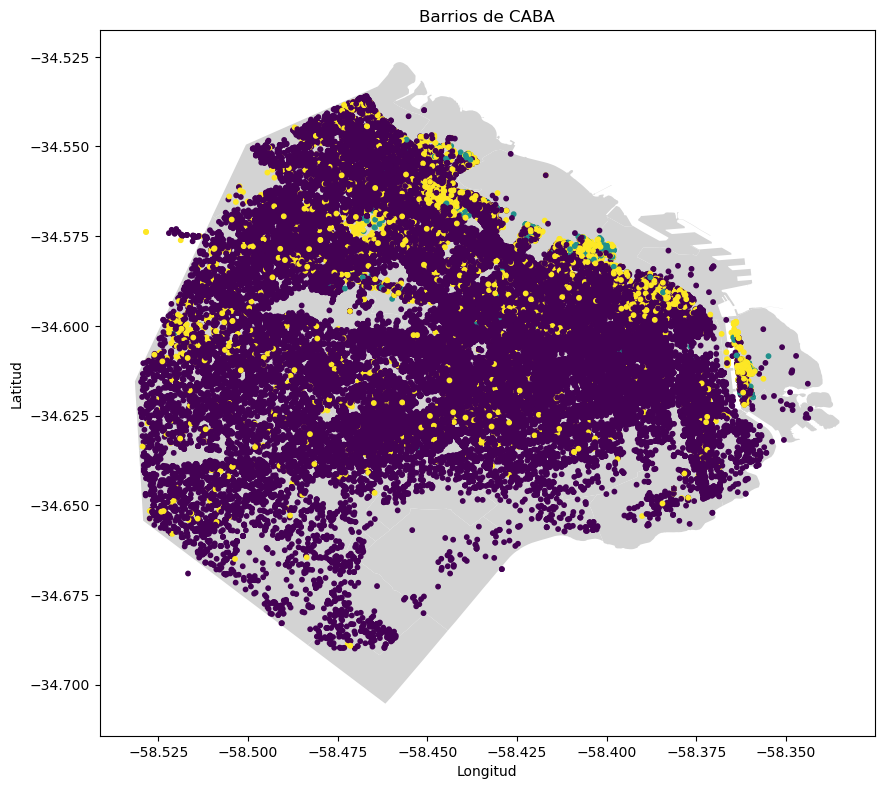

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
barrios = gp.read_file("barrios.geojson")
ax.set_title('Barrios de CABA')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
barrios.plot(ax=ax,column='BARRIO', color='lightgrey');

puntos = gp.GeoDataFrame(df_testeo.colores2, geometry=gp.points_from_xy(df_testeo.longitud, df_testeo.latitud))    
puntos.plot(ax = ax, column='colores2',cmap = 'viridis',markersize=10)
plt.show()

Se puede observar que hay muy pocos inmobiliario de precio "alto" a comparación de precios "bajos" y "normales" y únicamente existen en determinados barrios.

In [31]:
df_testeo.to_csv("punto2.csv")

: 